In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

In [3]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
Y

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [5]:

# Rescale grayscale values to [0,1].
X = X / 255.0

In [6]:
X.shape

(70000, 784)

In [7]:
# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

In [8]:
print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


In [9]:
number_indices=np.where(mini_train_labels == 9)[0]
#mini_train_data[np.random.choice(number_indices,1)]

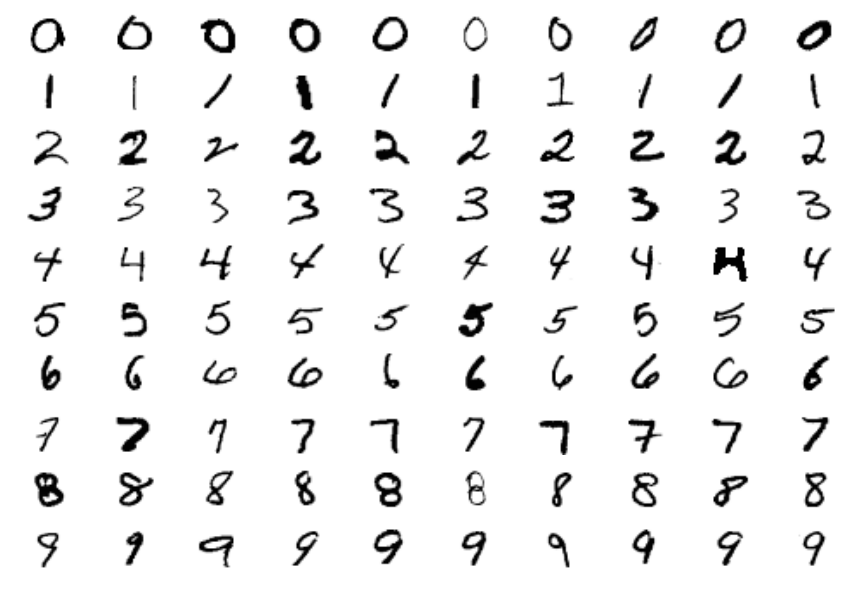

In [10]:
def p1(num_examples =10):
    plt.rc('image',cmap='Greys')
    plt.figure(figsize=(15,10))
    fignum=1
    for i in range(num_examples):
        for j in range(num_examples):
            number_indices = np.where(mini_train_labels == i)[0]
            pixel_data= mini_train_data[np.random.choice(number_indices,1)].reshape(28,28)
            plt.subplot(10,num_examples,fignum)
            fignum+=1
            plt.axis('off')
            plt.imshow(pixel_data)
p1(10)

In [11]:
def p2(k_values):
    for k in k_values:
        model=KNeighborsClassifier(n_neighbors=k)
        model.fit(mini_train_data,mini_train_labels)
        print "For k = {0} , Accurcy = {1}".format(k,model.score(dev_data,dev_labels))
        if k==1:
            label_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
            preds= model.predict(dev_data)
            cls_report = classification_report(y_true=dev_labels,y_pred=preds,target_names=label_names)
    print '-------------------------'
    print 'Classification Report for K =1 '
    print cls_report

In [12]:
k_values = [1,3,5,7,9]
p2(k_values)

For k = 1 , Accurcy = 0.888
For k = 3 , Accurcy = 0.878
For k = 5 , Accurcy = 0.869
For k = 7 , Accurcy = 0.865
For k = 9 , Accurcy = 0.863
-------------------------
Classification Report for K =1 
             precision    recall  f1-score   support

       Zero       0.91      0.98      0.94        99
        One       0.89      1.00      0.94       105
        Two       0.99      0.79      0.88       102
      Three       0.77      0.87      0.82        86
       Four       0.89      0.82      0.85       104
       Five       0.93      0.84      0.88        91
        Six       0.94      0.96      0.95        98
      Seven       0.89      0.92      0.90       113
      Eight       0.94      0.88      0.91        96
       Nine       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



In [13]:
def p3(train_sizes,accuracies):
    for train_size in train_sizes:
        temp_train_data,temp_train_labels = X[:train_size],Y[:train_size]
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(temp_train_data,temp_train_labels)
        t1=  time.time()
        preds = model.predict(dev_data)
        t2 = time.time()
        timetaken =  round(t2-t1,3)
        
        accuracy = model.score(dev_data,dev_labels)
        print "Train size : {0}, Accuracy : {1}, Time taken {2} sec".format(train_size,accuracy,timetaken)
        accuracies.append(accuracy)

In [14]:
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
p3(train_sizes, accuracies)

Train size : 100, Accuracy : 0.72, Time taken 0.096 sec
Train size : 200, Accuracy : 0.786, Time taken 0.198 sec
Train size : 400, Accuracy : 0.841, Time taken 0.413 sec
Train size : 800, Accuracy : 0.884, Time taken 0.801 sec
Train size : 1600, Accuracy : 0.902, Time taken 1.777 sec
Train size : 3200, Accuracy : 0.926, Time taken 3.535 sec
Train size : 6400, Accuracy : 0.937, Time taken 7.256 sec
Train size : 12800, Accuracy : 0.959, Time taken 14.788 sec
Train size : 25000, Accuracy : 0.97, Time taken 27.501 sec


In [15]:
x = np.array(train_sizes).reshape(len(train_sizes),1)
x

array([[  100],
       [  200],
       [  400],
       [  800],
       [ 1600],
       [ 3200],
       [ 6400],
       [12800],
       [25000]])

('The simple linear model predicts for 60000 :', 1.2430722603554991)
('The log linear model predicts for 60000 :', 0.069204187139763396)


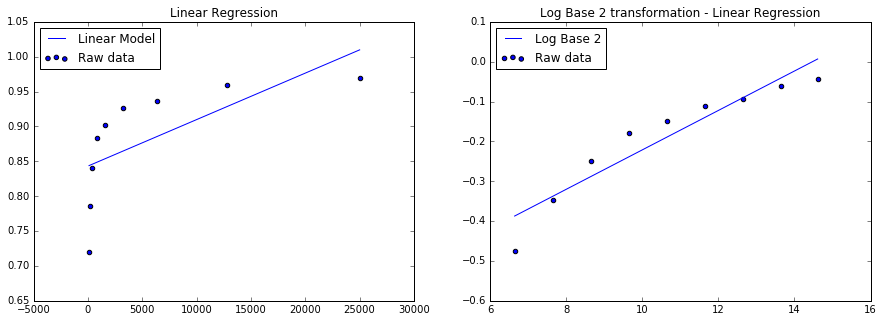

In [16]:
def p4():
    #create the training sizes to X np array
    x = np.array(train_sizes).reshape(len(train_sizes),1)
    y = accuracies
    lr = LinearRegression(fit_intercept=True)
    lr.fit(x,y)
    print("The simple linear model predicts for 60000 :",lr.predict(60000)[0])
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.scatter(x,y,label="Raw data")
    plt.plot(x,lr.predict(x),label="Linear Model")
    plt.legend(loc="best")
    plt.title("Linear Regression")
    
    ### Apply Transformation


    lrlog = LinearRegression(fit_intercept=True)
    logx = np.log2(x)
    logy = np.log2(y)
    lrlog.fit(logx,logy)
    print("The log linear model predicts for 60000 :",lrlog.predict(np.log2(60000))[0])
    plt.subplot(1, 2, 2)
    plt.scatter(logx, logy, label = "Raw data")
    plt.plot(logx, lrlog.predict(logx), label = "Log Base 2")
    plt.legend(loc="best")
    plt.title("Log Base 2 transformation - Linear Regression")
    
    
    
    
p4()
    

In [29]:
def p5():
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(mini_train_data, mini_train_labels)
    preds = model.predict(dev_data)
    cfm = confusion_matrix(preds,dev_labels)
    print("Confusion Matrix")
    print cfm
    ## Mark the diagnol elements = -1
    for i in range(cfm.shape[0]):
        cfm[i,i]= -1
    flatcfm = cfm.flatten()
    print flatcfm
    print flatcfm.max()
    for _ in range(5):
        i = np.where(flatcfm==flatcfm.max()) ## Get the flat index of most confused digit
        cfmindex =  np.unravel_index(i[0][0],cfm.shape) ### Convert the flat index to the confusion matrix index
        flatcfm[i[0][0]] =  -1 ## Assign -1 to the flat matrix so that we get the next big value in the cfm 
        pred = cfmindex[0]
        dev_label = cfmindex[1]
        
        array_wrong_pregs = np.where(preds==pred)
        array_tru_digits = np.where(dev_labels == dev_label)
        
        confused_digits =  np.intersect1d(array_wrong_pregs,array_tru_digits)
        
        if len(confused_digits) > 10:
            confused_digits = confused_digits[:10]
        plt.figure(figsize=(len(confused_digits)*1.5, len(confused_digits)))
        fignum = 1
        for j in confused_digits:
            if fignum == 1:
                print 'Predicted', pred, '; Actual', dev_label
            plt.subplot(1, len(confused_digits), fignum)
            fignum += 1
            plt.axis('off')
            plt.imshow(dev_data[j].reshape(28, 28))

        plt.show()
    
    

Confusion Matrix
[[ 97   0   4   1   0   2   1   1   0   1]
 [  0 105   4   0   2   0   1   4   2   0]
 [  0   0  81   0   0   0   1   0   0   0]
 [  0   0   4  75   0   9   0   1   5   3]
 [  0   0   0   0  85   0   1   1   0   9]
 [  0   0   0   3   0  76   0   0   2   1]
 [  2   0   0   0   3   0  94   0   1   0]
 [  0   0   4   3   0   1   0 104   0   5]
 [  0   0   3   1   0   1   0   0  84   0]
 [  0   0   2   3  14   2   0   2   2  87]]
[-1  0  4  1  0  2  1  1  0  1  0 -1  4  0  2  0  1  4  2  0  0  0 -1  0  0
  0  1  0  0  0  0  0  4 -1  0  9  0  1  5  3  0  0  0  0 -1  0  1  1  0  9
  0  0  0  3  0 -1  0  0  2  1  2  0  0  0  3  0 -1  0  1  0  0  0  4  3  0
  1  0 -1  0  5  0  0  3  1  0  1  0  0 -1  0  0  0  2  3 14  2  0  2  2 -1]
14
Predicted 9 ; Actual 4


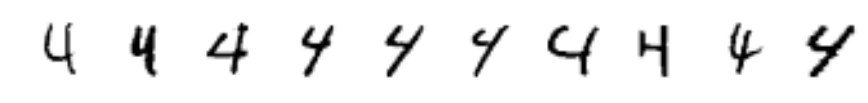

Predicted 3 ; Actual 5


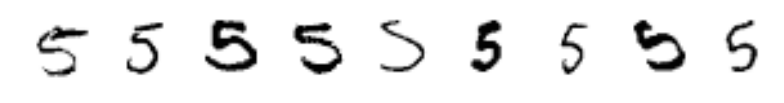

Predicted 4 ; Actual 9


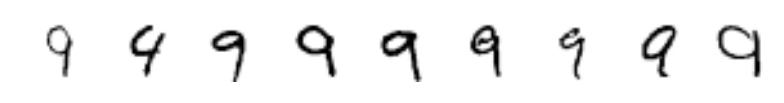

Predicted 3 ; Actual 8


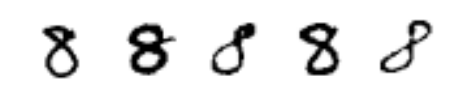

Predicted 7 ; Actual 9


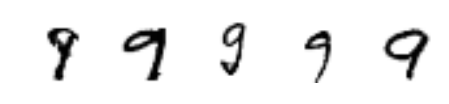

In [30]:
p5()

Gaussian blur in action:


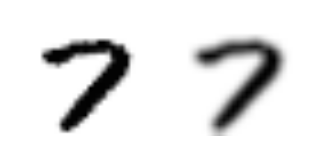

In [34]:
def findNeighbours(pixel, edge=28):
    x = int(pixel/edge)
    y = pixel - (x*edge)
    n =[''] * 8
    n[0] = (x-1, y-1)
    n[1] = (x-1, y)
    n[2] = (x-1, y+1)
    n[3] = (x, y-1)
    n[4] = (x, y+1)
    n[5] = (x+1, y-1)
    n[6] = (x+1, y)
    n[7] = (x+1, y+1)
    # Removing pixels not in matrix
    nghb = [n[i] for i in range(8) if n[i][0] >= 0 and n[i][1] >= 0 and n[i][0] < edge and n[i][1] < edge]
    pixels = [nghb[i][0]*edge + nghb[i][1] for i in range(len(nghb))]
    pixels.append(pixel)
    return pixels
def gblur(img):
    gblr = np.array(img)
    for i in range(len(img)):
        ngbhrs = img[findNeighbours(i)]        # Getting list of neighbors (Max 8; min 3)
        gblr[i] = sum(ngbhrs) / len(ngbhrs)   # Computing mean of neoghbors and self pixel value 
    return gblr
    
# Example of Gaussian blur
print "Gaussian blur in action:"
plt.figure(figsize=(5, 3))
plt.subplot(1, 2, 1)
plt.imshow(train_data[9000].reshape(28, 28))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(gblur(train_data[9000]).reshape(28, 28))
plt.axis('off')
plt.show()    

In [ ]:
def p6():
    ### STUDENT START ###
    # Pre-processing train data
    preprocess_train_data = np.array(train_data)
    for i, val in enumerate(preprocess_train_data):
        preprocess_train_data[i] = gblur(val)
    # Pre-processing dev data
    preprocess_dev_data = np.array(dev_data)
    for i, val in enumerate(preprocess_dev_data):
        preprocess_dev_data[i] = gblur(val)    
    
    # Calculating Accuracy
    # With blurring training only
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(preprocess_train_data, train_labels)
    print 'Accuracy: Blurred training data only:', model.score(dev_data, dev_labels)
    
    # With blurring dev data only
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(train_data, train_labels)
    print 'Accuracy: Blurred dev data only:', model.score(preprocess_dev_data, dev_labels)   
    
    # With blurring Blur both dev and training
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(preprocess_train_data, train_labels)
    print 'Accuracy: Blurred both dev and training data:', model.score(preprocess_dev_data, dev_labels) 

### STUDENT END ###
p6()
    

In [ ]:
def p7():
    threshold=0.5
    alpha =1 
    clf = BernoulliNB(alpha=alpha, binarize=threshold)
    clf.fit(mini_train_data, mini_train_labels)
    print 'BernoulliNB Accuracy:', clf.score(dev_data, dev_labels)
    
    # MultinomialNB
    # Mapping pixel values to 0, 1 or 2
    def mappingto123(inputdata):
        temp = np.array(inputdata)
        for rowindex, rowvalue in enumerate(temp):
            for columnindex, columnvalue in enumerate(rowvalue):
                if columnvalue <= 1.0/3:
                    temp[rowindex, columnindex] = 0
                elif columnvalue <= 2.0/3:
                    temp[rowindex, columnindex] = 1
                else:
                    temp[rowindex, columnindex] = 2
        return temp

    multiclf = MultinomialNB(alpha=alpha)
    multiclf.fit(mappingto123(mini_train_data), mini_train_labels)
    print 'MultinomialNB Accuracy:', multiclf.score(dev_data, dev_labels)


In [ ]:
def P8(alphas):

### STUDENT START ###
    threshold = 0.5
    bnb = BernoulliNB(binarize=threshold)
    clf = GridSearchCV(bnb, alphas)
    clf.fit(mini_train_data, mini_train_labels)
    
    # Printing Accuracy @ diffirent alphas
    for params, score, l in clf.grid_scores_:
        print '{0}; Accuracy: {1}'.format(params, score)
    
    print '\nBest Alpha: {0}; Accuracy: {1}'.format(clf.best_params_, clf.best_score_)


### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)